In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time
import csv

In [8]:
# --- Helper: Check if a subset is a vertex cover ---
def is_vertex_cover(sample_nodes, edges):
    for u, v in edges:
        if u not in sample_nodes and v not in sample_nodes:
            return False
    return True

# --- Brute Force Minimum Vertex Cover ---
def minimum_vertex_cover(nodes, edges):
    for r in range(1, len(nodes) + 1):
        for subset in itertools.combinations(nodes, r):
            if is_vertex_cover(subset, edges):
                return set(subset), list(edges)
    return set(nodes), list(edges)  # fallback

In [9]:
# --- 2-Approximation Algorithm ---
def vertex_cover_2approx(edges):
    cover = set()
    edgelist = list(edges)
    used_edges = []
    deleted_edges = []

    while edgelist:
        (u, v) = edgelist.pop()
        cover.add(u)
        cover.add(v)
        used_edges.append((u, v))

        # Delete edges incident on u or v
        to_delete = [(x, y) for (x, y) in edgelist if x == u or y == u or x == v or y == v]
        deleted_edges.extend(to_delete)
        edgelist = [(x, y) for (x, y) in edgelist if (x, y) not in to_delete]

    return cover, used_edges, deleted_edges

In [10]:
# --- Graph Drawing with Edge Colors ---
def draw_graph(G, cover, used_edges, deleted_edges, title):
    edge_colors = []
    for edge in G.edges():
        if edge in used_edges or (edge[1], edge[0]) in used_edges:
            edge_colors.append("green")   # edges used in 2-approx
        elif edge in deleted_edges or (edge[1], edge[0]) in deleted_edges:
            edge_colors.append("red")     # deleted edges
        else:
            edge_colors.append("grey")    # untouched edges

    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=["lightblue" if n not in cover else "orange" for n in G.nodes()],
        node_size=800,
        font_color="black",
        font_size=12,
        edge_color=edge_colors,
        width=2
    )
    plt.title(title)
    plt.show()

### Graph with 10 nodes and [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] edges


Running experiment for n=10, m=10
Brute Force Vertex Cover: {1, 2, 4, 6, 9}
Size: 5, Time: 0.000201 sec
2-Approximation Vertex Cover: {2, 5, 6, 7, 8, 9}
Size: 6, Time: 0.000043 sec
Approximation Factor: 1.200


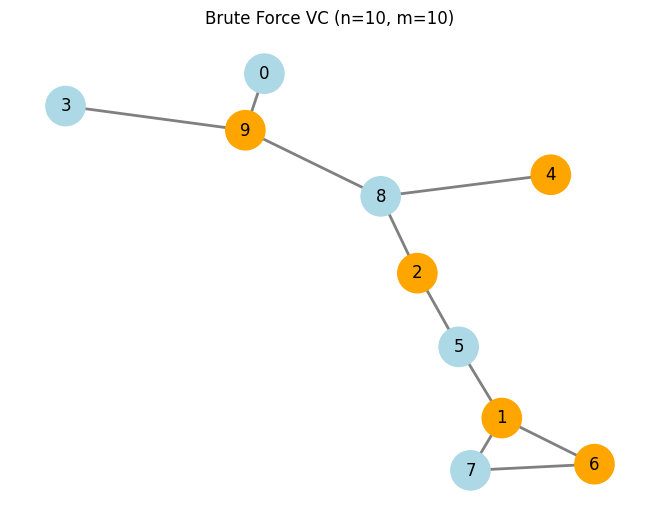

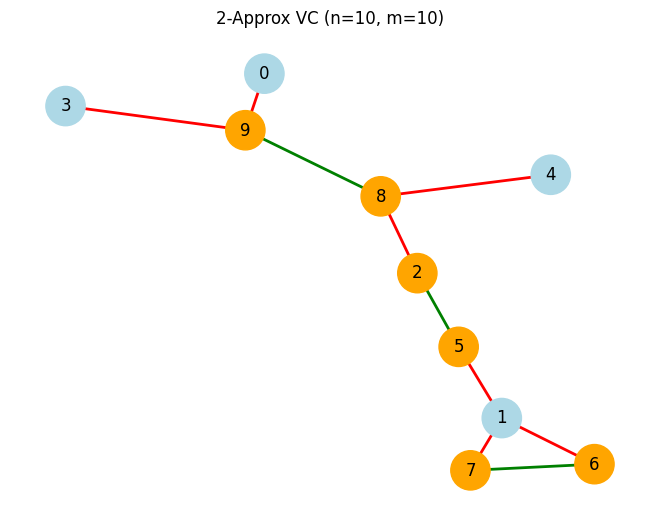


Running experiment for n=10, m=20
Brute Force Vertex Cover: {1, 2, 4, 5, 7, 9}
Size: 6, Time: 0.000377 sec
2-Approximation Vertex Cover: {1, 3, 4, 5, 6, 7, 8, 9}
Size: 8, Time: 0.000024 sec
Approximation Factor: 1.333


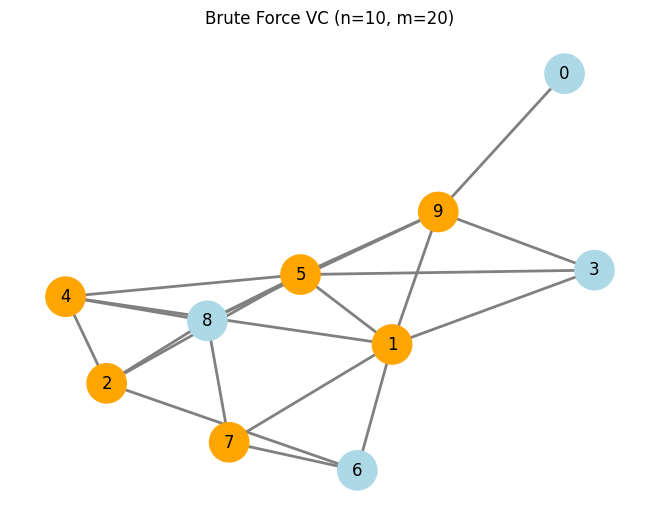

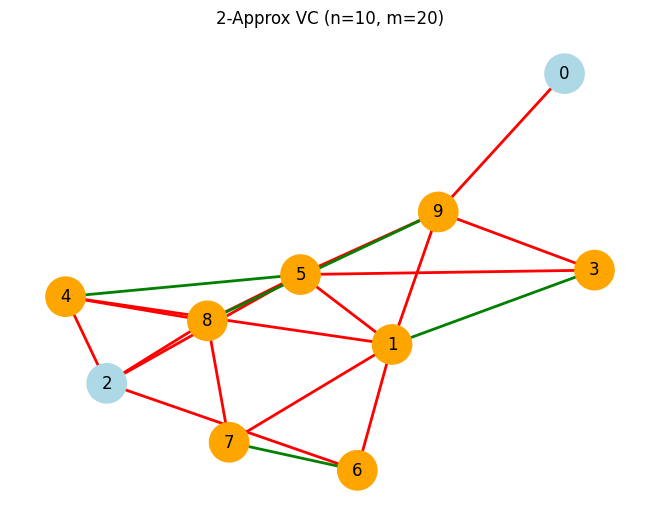


Running experiment for n=10, m=30
Brute Force Vertex Cover: {0, 1, 3, 4, 5, 6, 8}
Size: 7, Time: 0.000488 sec
2-Approximation Vertex Cover: {1, 3, 4, 5, 6, 7, 8, 9}
Size: 8, Time: 0.000033 sec
Approximation Factor: 1.143


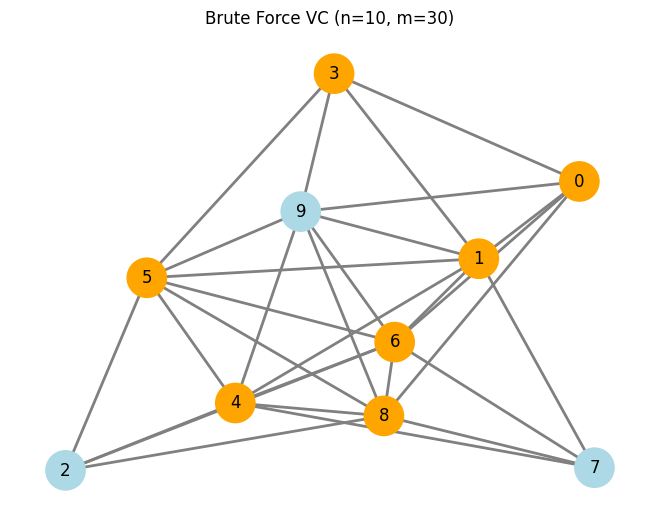

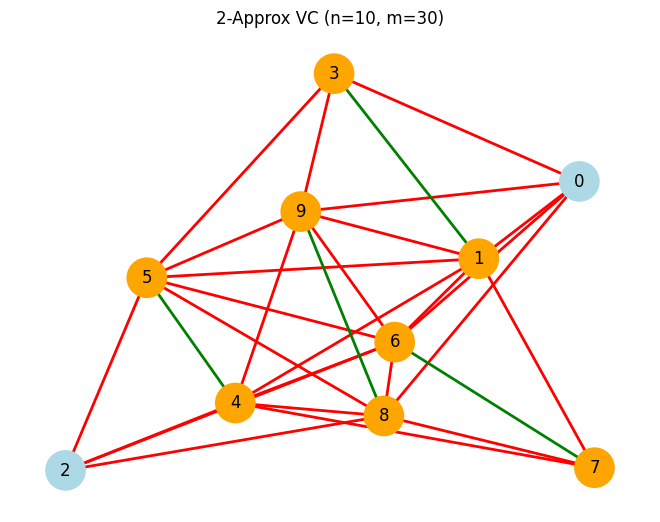


Running experiment for n=10, m=40
Brute Force Vertex Cover: {0, 1, 2, 4, 5, 6, 7, 9}
Size: 8, Time: 0.000633 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000074 sec
Approximation Factor: 1.250


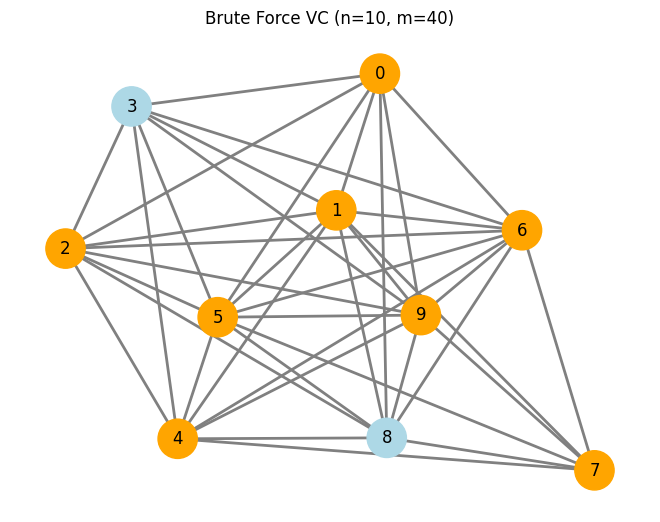

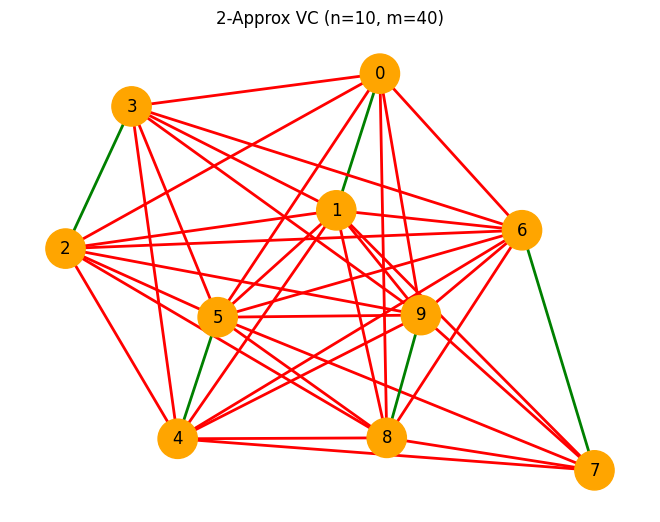


Running experiment for n=10, m=50
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000940 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000079 sec
Approximation Factor: 1.111


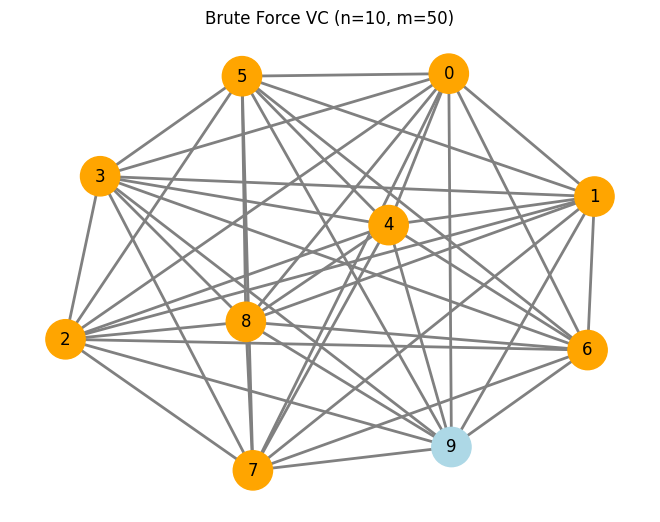

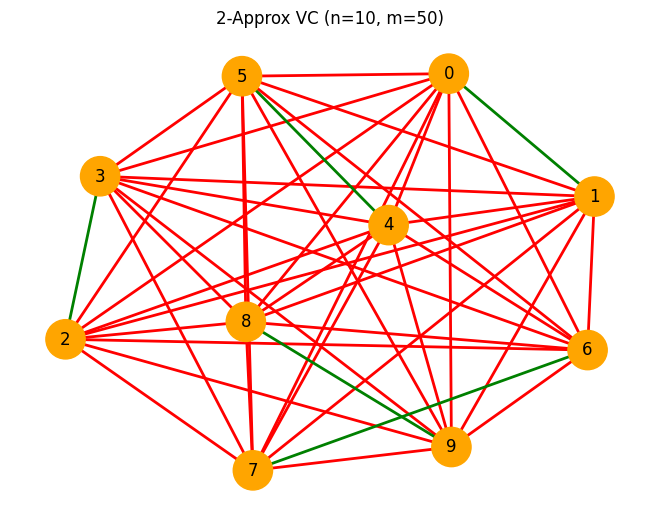


Running experiment for n=10, m=60
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000802 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000055 sec
Approximation Factor: 1.111


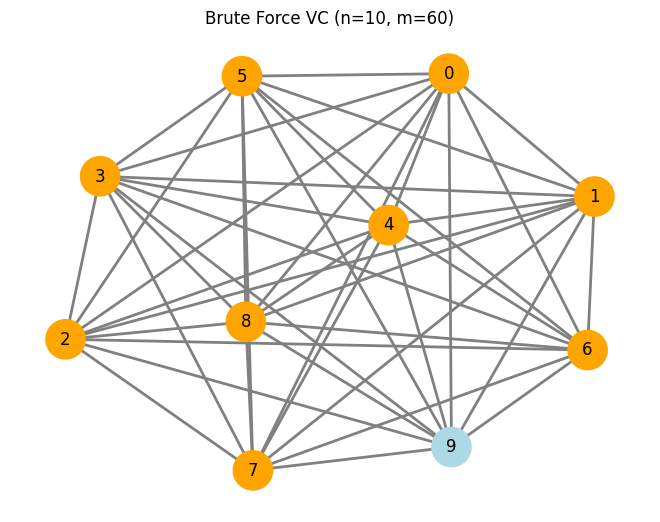

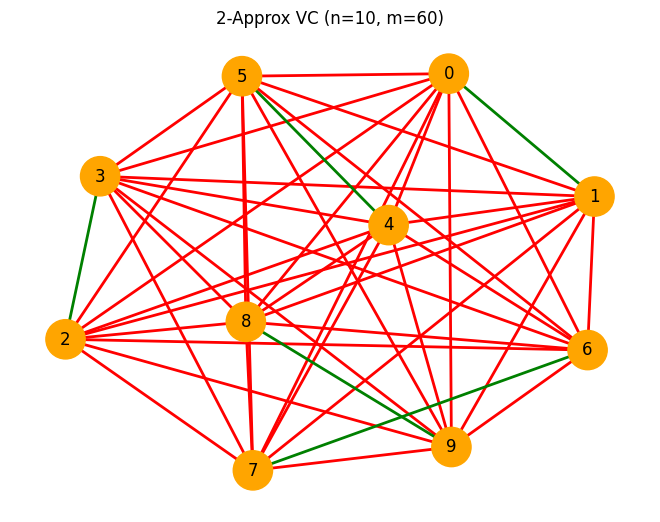


Running experiment for n=10, m=70
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000680 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000055 sec
Approximation Factor: 1.111


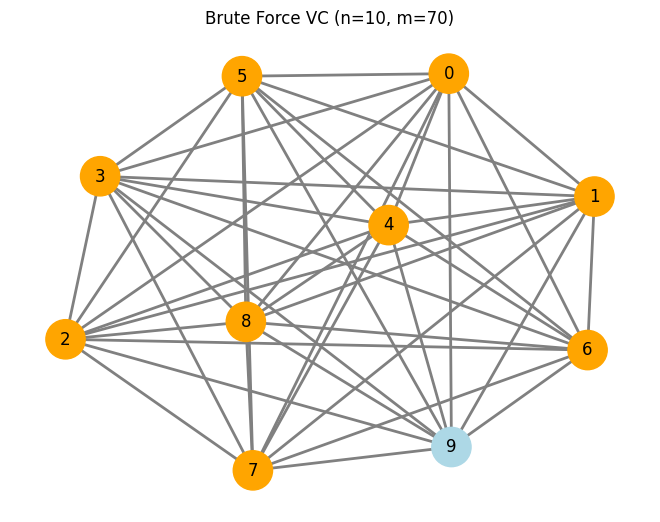

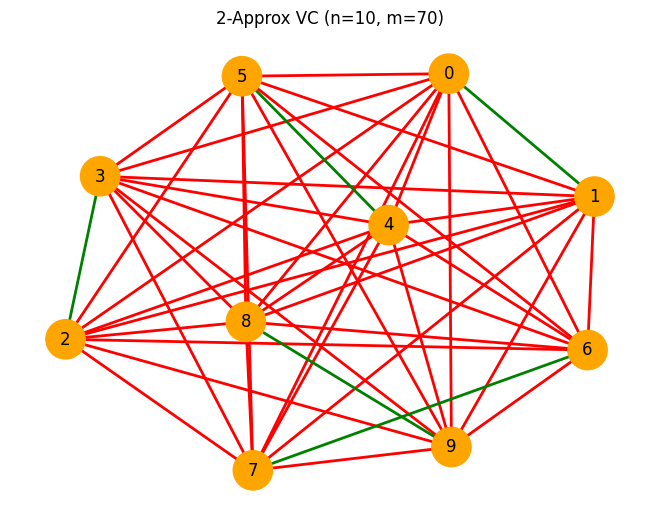


Running experiment for n=10, m=80
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000691 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000055 sec
Approximation Factor: 1.111


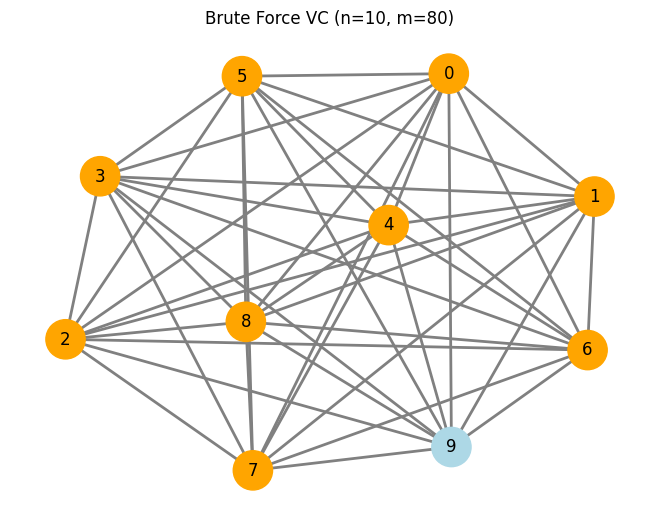

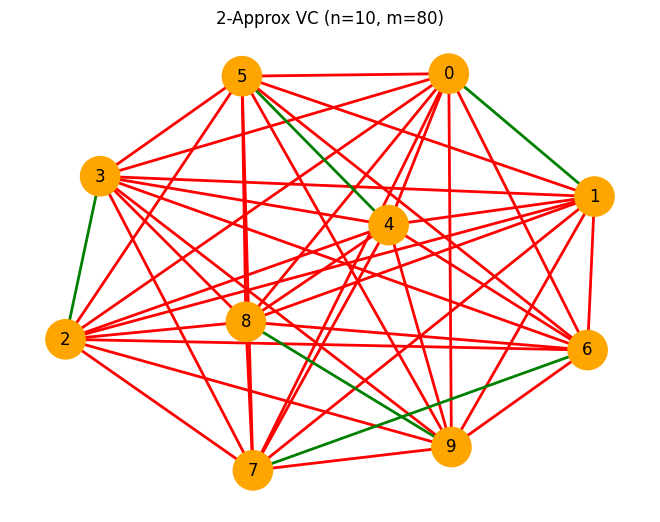


Running experiment for n=10, m=90
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000711 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000057 sec
Approximation Factor: 1.111


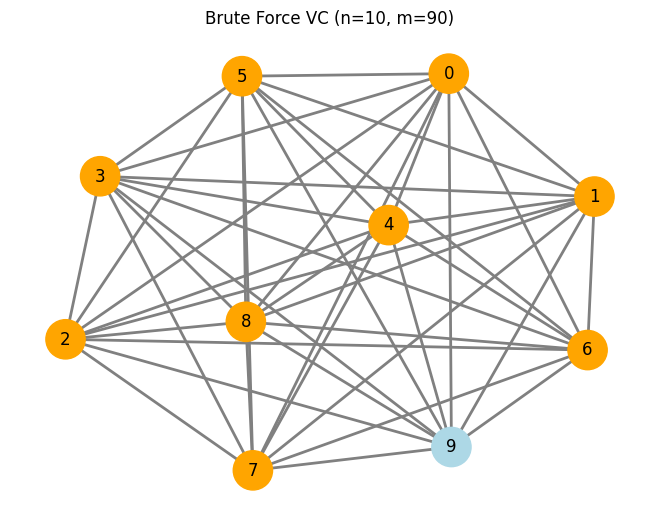

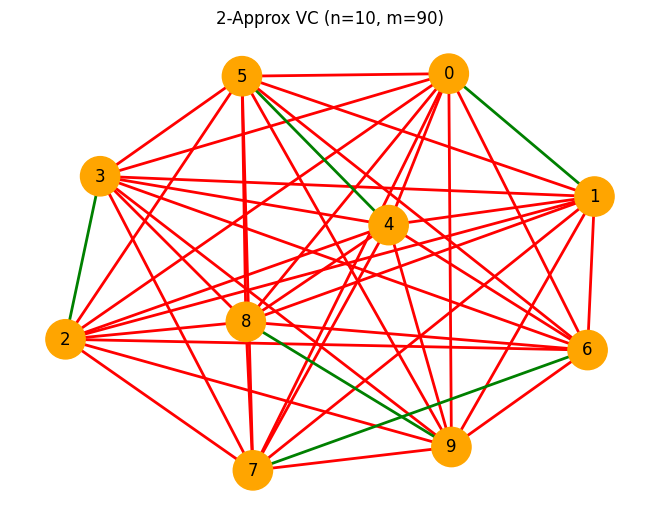


Running experiment for n=10, m=100
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000687 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Size: 10, Time: 0.000059 sec
Approximation Factor: 1.111


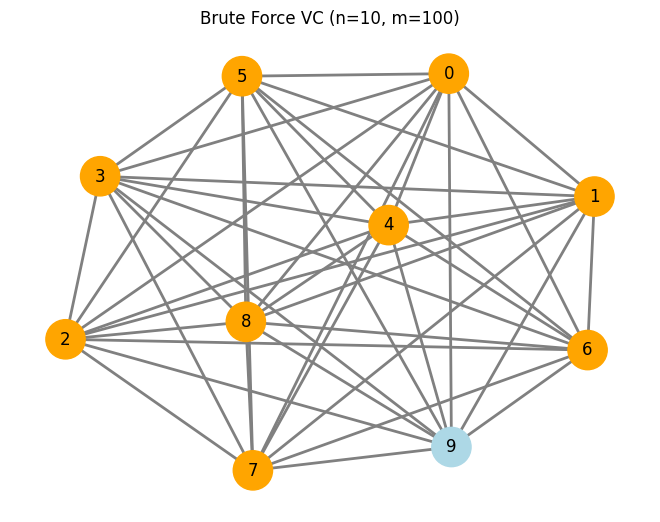

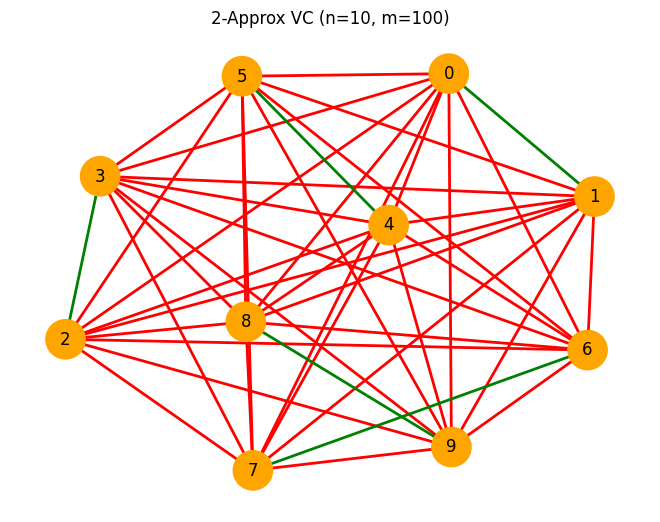

In [11]:
# --- Read from file ---
with open("input.txt", "r") as f:
    lines = f.readlines()
    n = int(lines[0].strip())  # first line = number of nodes
    m_values = list(map(int, lines[1].strip().split(",")))  # second line = edge counts
results = []

for m in m_values:
    print("\n==============================")
    print(f"Running experiment for n={n}, m={m}")
    print("==============================")

    # Generate random graph
    graph = nx.gnm_random_graph(n, m, seed=46)
    nodes = list(graph.nodes())
    edges = list(graph.edges())

    # Brute Force
    start = time.time()
    cover_bf, edges_bf = minimum_vertex_cover(nodes, edges)
    time_bf = time.time() - start
    print(f"Brute Force Vertex Cover: {cover_bf}")
    print(f"Size: {len(cover_bf)}, Time: {time_bf:.6f} sec")

    # 2-Approximation
    start = time.time()
    cover_2a, used_edges, deleted_edges = vertex_cover_2approx(edges)
    time_2a = time.time() - start
    print(f"2-Approximation Vertex Cover: {cover_2a}")
    print(f"Size: {len(cover_2a)}, Time: {time_2a:.6f} sec")

    # Approximation Factor
    approx_factor = len(cover_2a) / len(cover_bf)
    print(f"Approximation Factor: {approx_factor:.3f}")

    # Record results
    results.append([n, m, len(cover_bf), time_bf, len(cover_2a), time_2a, approx_factor])
    # Draw Results
    draw_graph(graph, cover_bf, [], [], f"Brute Force VC (n={n}, m={m})")
    draw_graph(graph, cover_2a, used_edges, deleted_edges, f"2-Approx VC (n={n}, m={m})")

In [13]:
# --- Save results to CSV ---
with open("2_approx_vertex_cover_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["n", "m", "BruteForce_Size", "BruteForce_Time(s)",
                     "Approx_Size", "Approx_Time(s)", "Approx_Factor"])
    writer.writerows(results)
print("\nAll results saved to 2_approx_vertex_cover_results.csv ✅")


All results saved to 2_approx_vertex_cover_results.csv ✅
